In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy import reshape
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question 1

In [2]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.shape

(50, 5)

In [5]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
data1 = pd.get_dummies(data)
data1

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [7]:
data1.rename(columns={'State_New York':'State_NewYork'},inplace='True')

In [8]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [9]:
data1.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_NewYork
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [10]:
grp = data.groupby(data['State']).mean()
grp

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


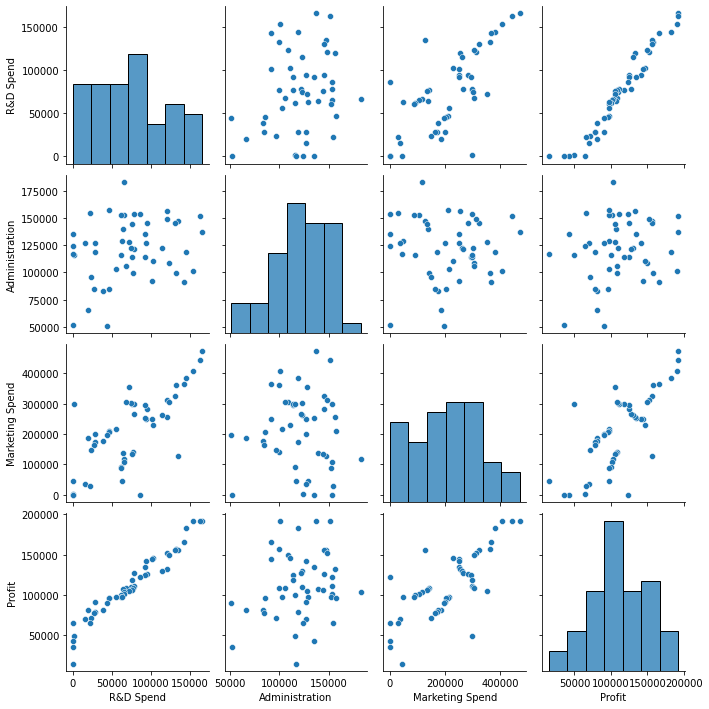

In [11]:
sns.pairplot(data)

In [12]:
data.rename(columns={'R&D Spend':'RD_Spend'},inplace='True')
data.rename(columns={'Marketing Spend':'Marketing_Spend'},inplace='True')

In [13]:
data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [14]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=data).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           4.53e-30
Time:                        14:44:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
import statsmodels.api as sm

In [17]:
resid = model.resid
resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

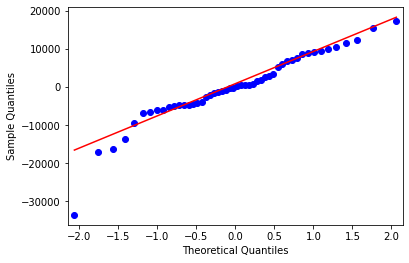

In [18]:
qqplot = sm.qqplot(resid,line='q')

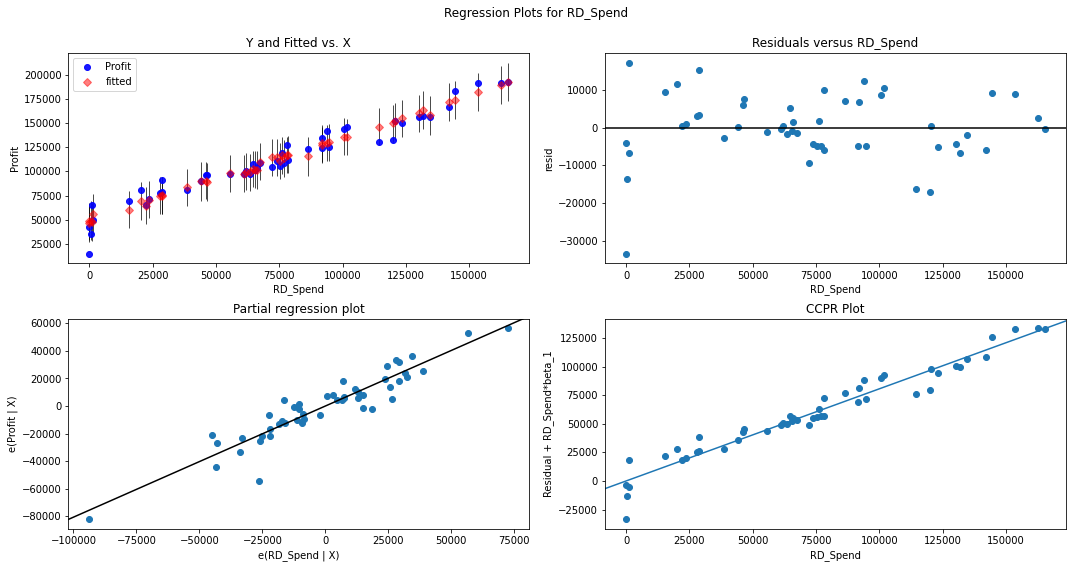

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'RD_Spend',fig=fig)

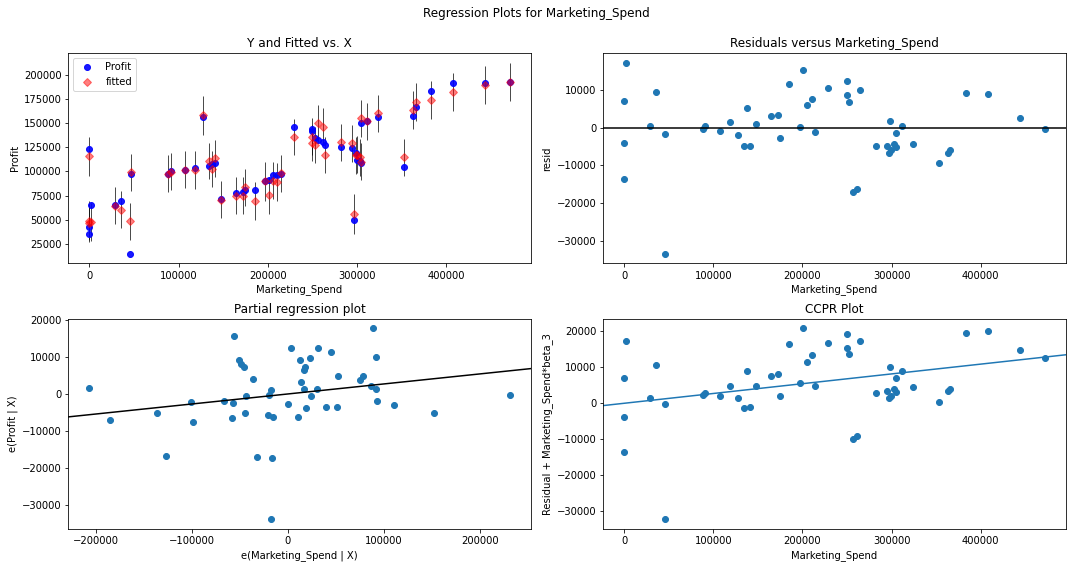

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)

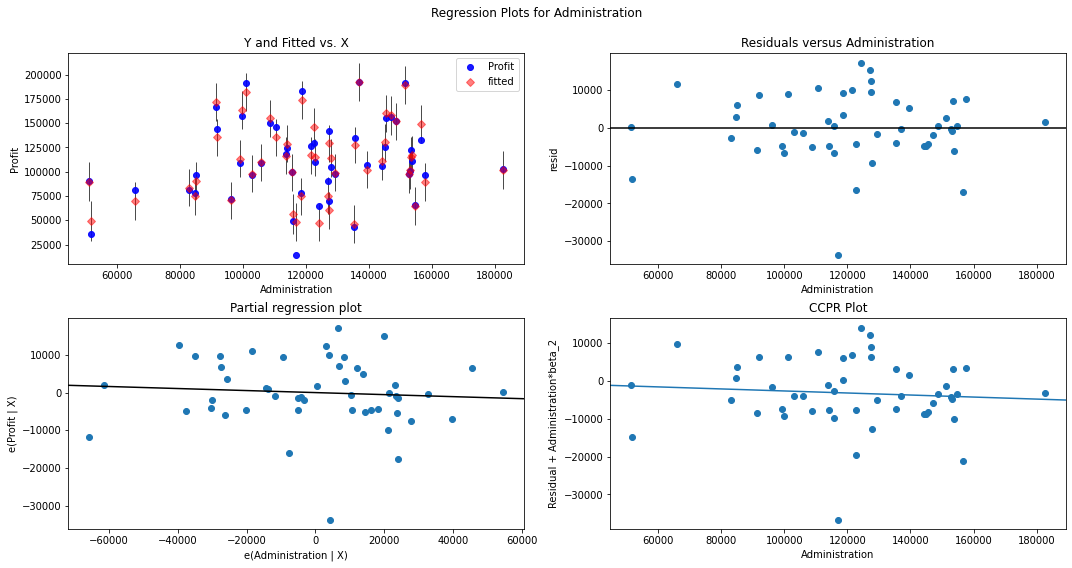

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Administration',fig=fig)

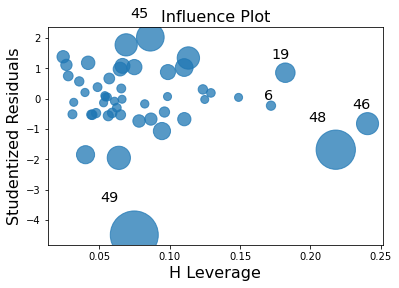

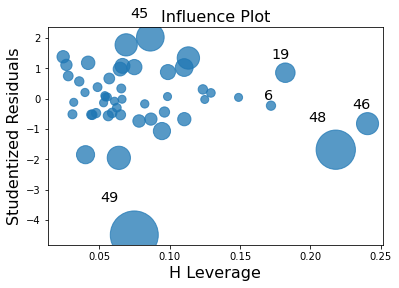

In [22]:
influence_plot(model)

In [23]:
data.shape

(50, 5)

In [24]:
co = 3*((4+1)/50)
co

0.30000000000000004

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


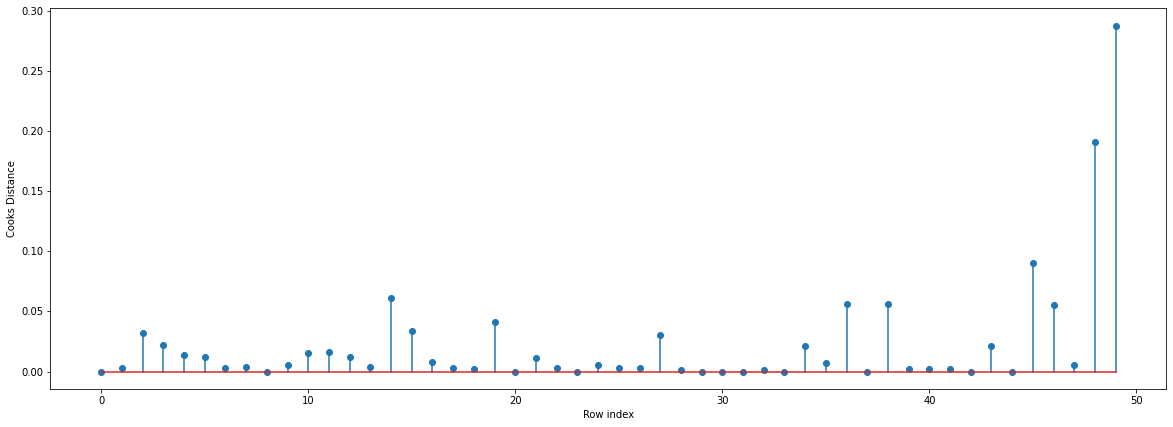

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
np.argmax(c)

49

In [28]:
data[data.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [29]:
data2 = data.drop(data.index[49],axis=0).reset_index()


In [30]:
data2.shape

(49, 6)

In [31]:
data2.head()

,index,RD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
data2 = data2.drop(columns='index')

In [33]:
data2.shape

(49, 5)

In [34]:
model1 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=data2).fit()

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           8.85e-32
Time:                        14:44:23   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_Spend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
data2.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
pred = pd.DataFrame({'RD_Spend':[123431.32,345326.32,124543.45],'Administration':[234211.23,462914.12,388291.34],'Marketing_Spend':[542134.32,459293.23,159324.90]},index=[0,1,2])
pred

,RD_Spend,Administration,Marketing_Spend
0,123431.32,234211.23,542134.32
1,345326.32,462914.12,459293.23
2,124543.45,388291.34,159324.90


In [38]:
model1.predict(pred)

0    157509.598522
1    324085.901174
2    145299.940260
dtype: float64

In [114]:
y = np.round(model1.predict(data2),0)

In [115]:
data2['Predicted_profit'] = y
data2

,RD_Spend,Administration,Marketing_Spend,State,Profit,Predicted_profit
0,165349.20,136897.80,471784.10,New York,192261.83,190717.0
1,162597.70,151377.59,443898.53,California,191792.06,187537.0
2,153441.51,101145.55,407934.54,Florida,191050.39,180576.0
3,144372.41,118671.85,383199.62,New York,182901.99,172461.0
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.0
5,131876.90,99814.71,362861.36,New York,156991.12,162583.0
6,134615.46,147198.87,127716.82,California,156122.51,157741.0
7,130298.13,145530.06,323876.68,Florida,155752.60,159348.0
8,120542.52,148718.95,311613.29,New York,152211.77,151329.0
9,123334.88,108679.17,304981.62,California,149759.96,154237.0


In [41]:
table = pd.DataFrame({"Model":['Model1','Model2'],'Rsquare_value':[model.rsquared,model1.rsquared]},index=[0,1])
table

,Model,Rsquare_value
0,Model1,0.950746
1,Model2,0.961316


# Question2

In [42]:
toyota = pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')


In [43]:
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [45]:
toyota.shape

(1436, 38)

In [46]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [47]:
toyota1 = toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [48]:
toyota1.rename({'Age_08_04':'Age'},inplace='True',axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
toyota1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


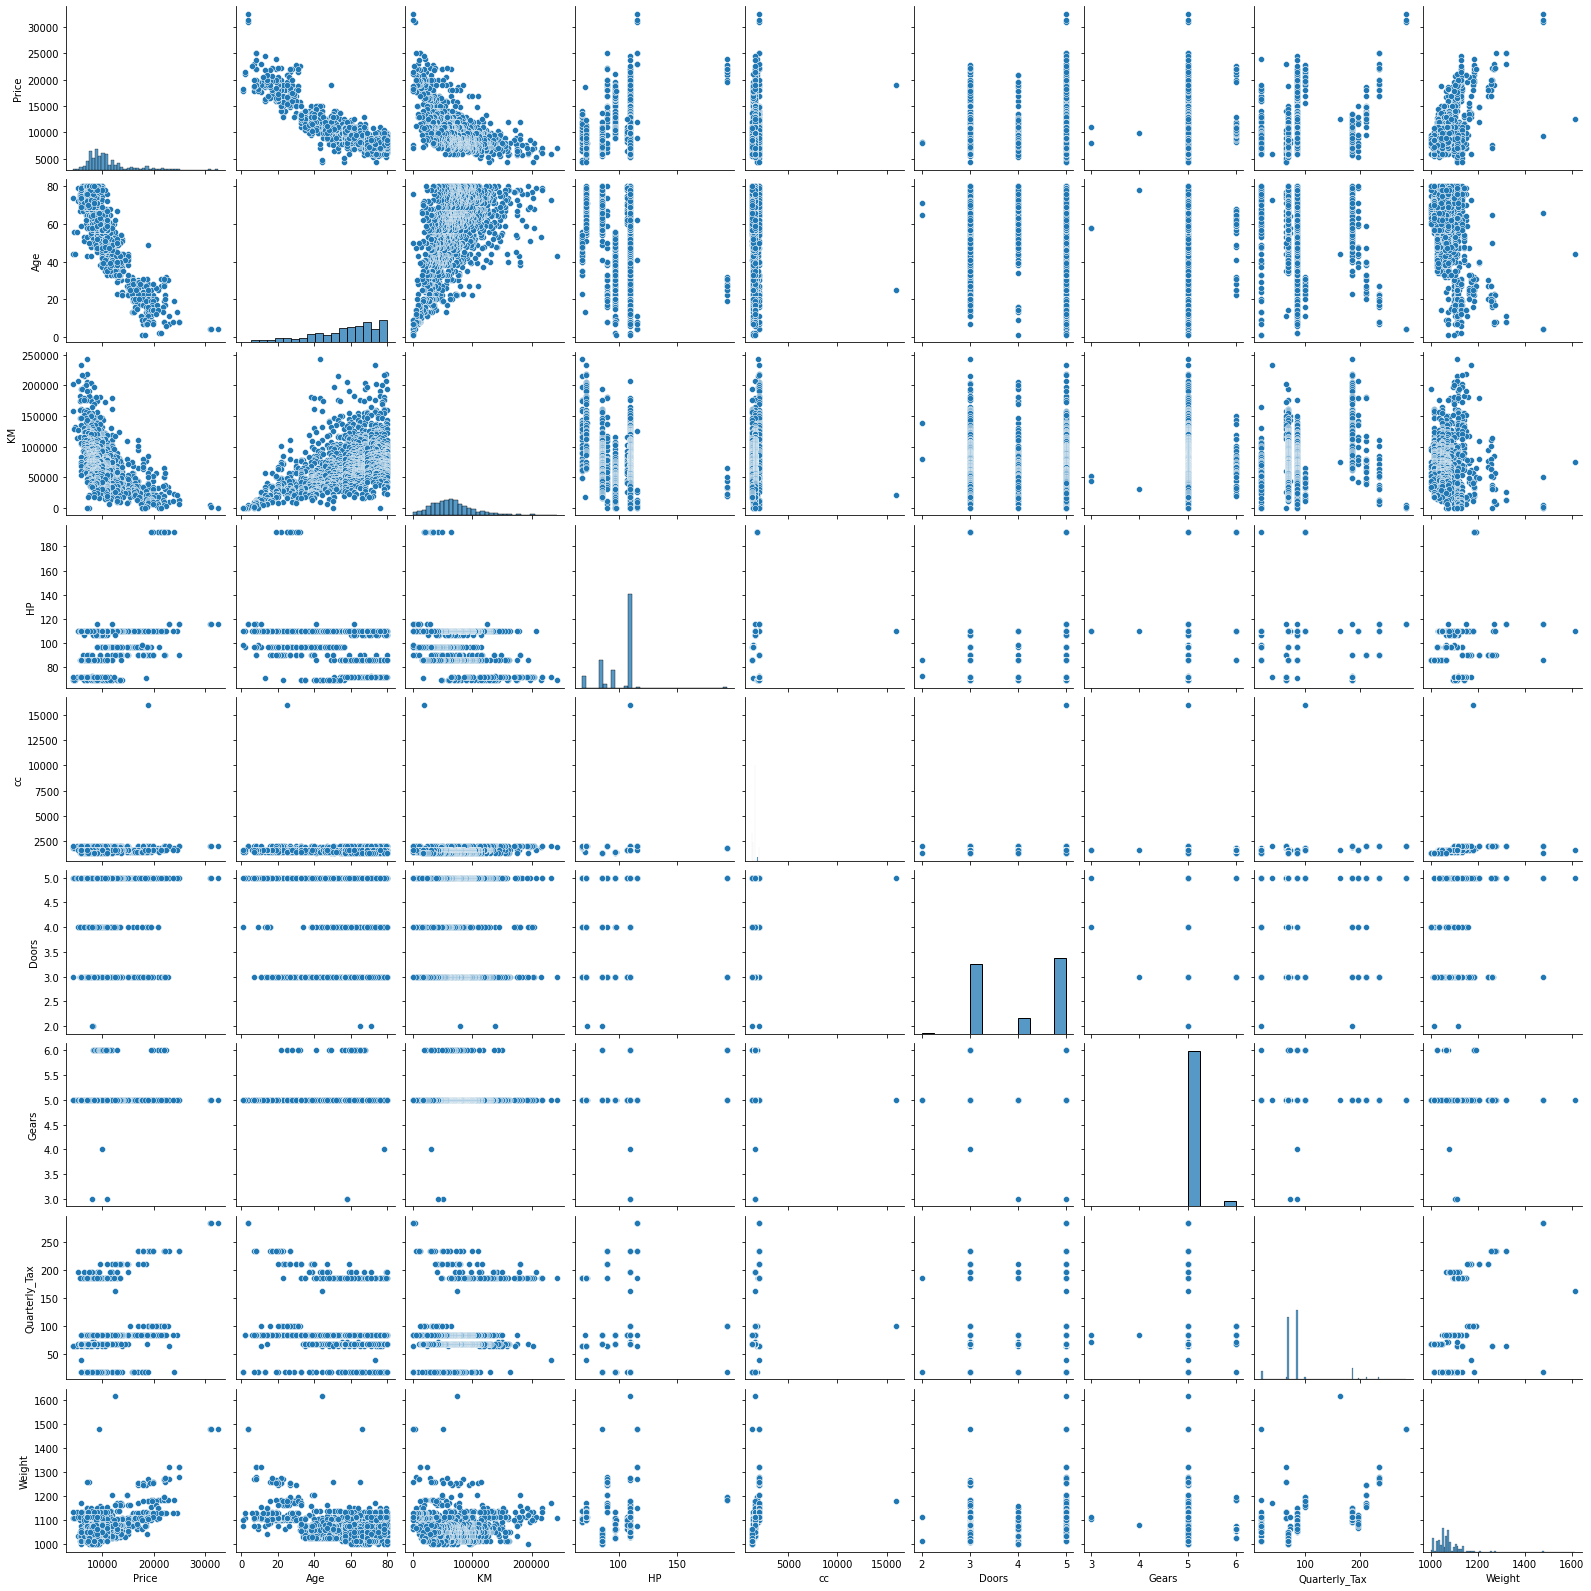

In [50]:
sns.pairplot(toyota1)

In [51]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [52]:
toy_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit()

In [53]:
toy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:45:05   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
toy_model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

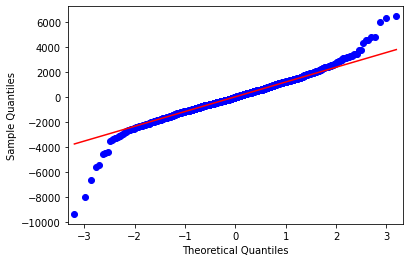

In [58]:
qq = sm.qqplot(toy_model.resid,line='q')

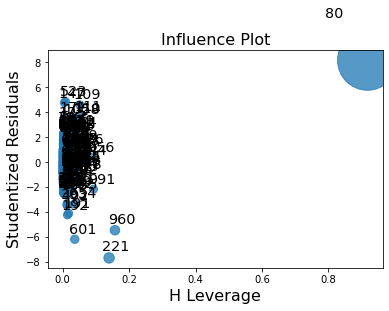

In [61]:
inplot =  influence_plot(toy_model,)

In [62]:
toyota1.shape

(1436, 9)

In [63]:
cutoff = 3*((9+1)/1436)
cutoff

0.020891364902506964

In [73]:
toy_model_influence = toy_model.get_influence()
(c_1, _) = toy_model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


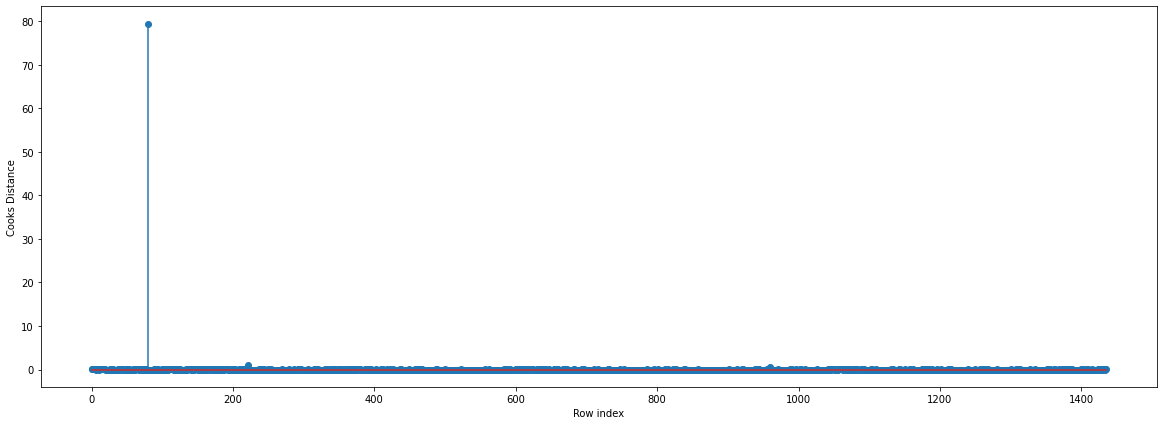

In [74]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota1)), np.round(c_1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
np.argmax(c_1)

80

In [77]:
toyota1[toyota1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [78]:
toyota2 = toyota1.drop(index=([80]),axis=0).reset_index()

In [79]:
toyota2.shape

(1435, 10)

In [80]:
toyota2.head()

,index,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [81]:
toyota2 = toyota2.drop(columns=('index'),axis=1)

In [82]:
toyota2.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [83]:
toy_model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = toyota2).fit()

In [85]:
toy_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:03:45   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age            -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

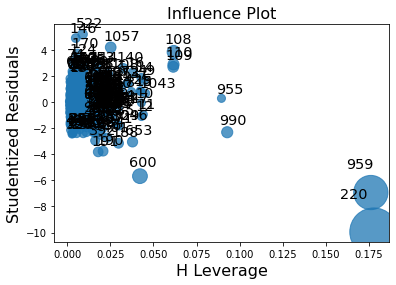

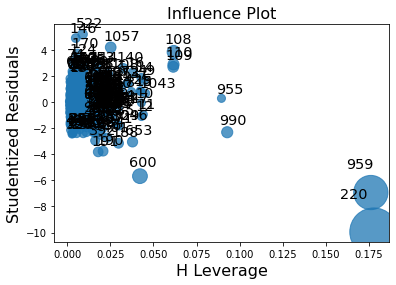

In [86]:
influence_plot(toy_model1)

In [88]:
toyota3 = toyota2.drop(index=([220,959]),axis=0).reset_index()
toyota3.shape

(1433, 10)

In [89]:
toyota3 = toyota3.drop(columns=('index'))

In [90]:
toyota3.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [91]:
toy_model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota3).fit()

In [92]:
toy_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:09:10   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

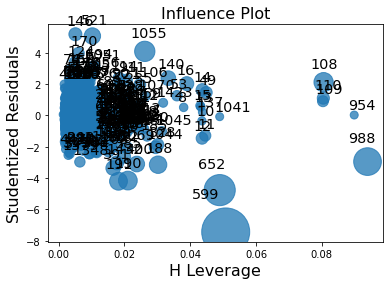

In [95]:
inplot1 =  influence_plot(toy_model2)

In [99]:
toyota4 = toyota3.drop(index=([599,652]),axis=0).reset_index()

In [100]:
toyota4 = toyota4.drop(columns=('index'))
toyota4.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [101]:
toyota4.shape

(1431, 9)

In [102]:
toy_model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota4).fit()

In [103]:
toy_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1459.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:13:49   Log-Likelihood:                -12169.
No. Observations:                1431   AIC:                         2.436e+04
Df Residuals:                    1422   BIC:                         2.440e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.731e+04   1423.084    -12.162      0.000   -2.01e+04   -1.45e+04
Age            -109.3979      2.428    -45.058      0.000    -114.161    -104.635
KM               -0.0176      0.001    -15.031      0.000      -0.020      -0.015
HP               33.0345      2.698     12.242      0.000      27.741      38.328
cc               -3.6666      0.294    -12.462      0.000      -4.244      -3.089
Doors          -161.2810     36.711     -4.393      0.000    -233.295     -89.268
Gears           461.7826    176.006      2.624      0.009     116.523     807.042
Quarterly_Tax     2.4869      1.368      1.817      0.069      -0.197       5.171
Weight           33.4779      1.295     25.848      0.000      30.937      36.019
==============================================================================
Omnibus:                       68.702   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.620
Skew:                           0.180   Prob(JB):                     2.02e-43
Kurtosis:                       4.780   Cond. No.                     3.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
toyota4.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [106]:
pred_data1 = pd.DataFrame({'Age':[24,12,56],'KM':[32452,65124,87523],'HP':[90,60,90],'cc':[2000,1000,2000],'Doors':[3,4,2],'Gears':[5,8,4],'Quarterly_Tax':[100,200,432],'Weight':[1187,3453,5641]})

In [107]:
pred_data1

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,24,32452,90,2000,3,5,100,1187
1,12,65124,60,1000,4,8,200,3453
2,56,87523,90,2000,2,4,432,5641


In [108]:
toy_model3.predict(pred_data1)

0     16947.131609
1     97694.192396
2    162112.926287
dtype: float64

In [112]:
z = np.round(toy_model3.predict(toyota4),0)

In [113]:
toyota4['Predicted_value'] = z
toyota4

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted_value
0,13500,23,46986,90,2000,3,5,210,1165,16338.0
1,13750,23,72937,90,2000,3,5,210,1165,15881.0
2,13950,24,41711,90,2000,3,5,210,1165,16321.0
3,14950,26,48000,90,2000,3,5,210,1165,15992.0
4,13750,30,38500,90,2000,3,5,210,1170,15889.0
...,...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025,9168.0
1427,10845,72,19000,86,1300,3,5,69,1015,8532.0
1428,8500,71,17016,86,1300,3,5,69,1015,8676.0
1429,7250,70,16916,86,1300,3,5,69,1015,8787.0
